In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload dataset
df = pd.read_csv("C:\\Users\\nabhe\\Downloads\\PostUni4\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 1. Understanding dataset

In [43]:
df.shape

(7043, 21)

In [44]:
# Show all columns
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values in any columns since all columns have 7043 non-null count. TotalCharges column should be float64 but it is showing object.

# 2. Cleaning dataset

In [47]:
# In TotalCharges, converting any non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [48]:
# Checking null values 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [49]:
# Replacing null values in TotalCharges by its median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [50]:
# Checking null values in TotalCharges
df['TotalCharges'].isnull().sum()

0

There are no null values throughout all columns

In [51]:
# Checking datatype of TotalCharges
df['TotalCharges'].dtype

dtype('float64')

Now, all columns have correct datatype

In [52]:
# Cheking duplicate values all across the table
df.duplicated().sum()

0

In [53]:
# Checking duplicate values on customerID
df['customerID'].duplicated().sum()

0

No duplicate values.

# 3. Summary Statistics

In [54]:
# Checking summary statistics of numerical variables
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2281.92
std,24.56,30.09,2265.27
min,0.00,18.25,18.80
25%,9.00,35.50,402.22
50%,29.00,70.35,1397.48
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


Average tenure time is 32 months and average monthly charges is $64.76

In [55]:
# Checking summary statistics of categorical variables
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Churn rate is ~26.5% ((7043-5174)/7043)

# 4. Visualizations and Insights

# Univariate Analysis

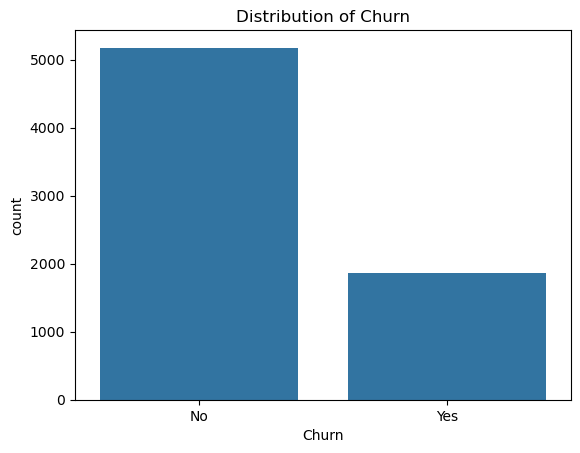

In [56]:
# Distribution of Churn
sns.countplot(df, x= 'Churn')
plt.title('Distribution of Churn')
plt.show()

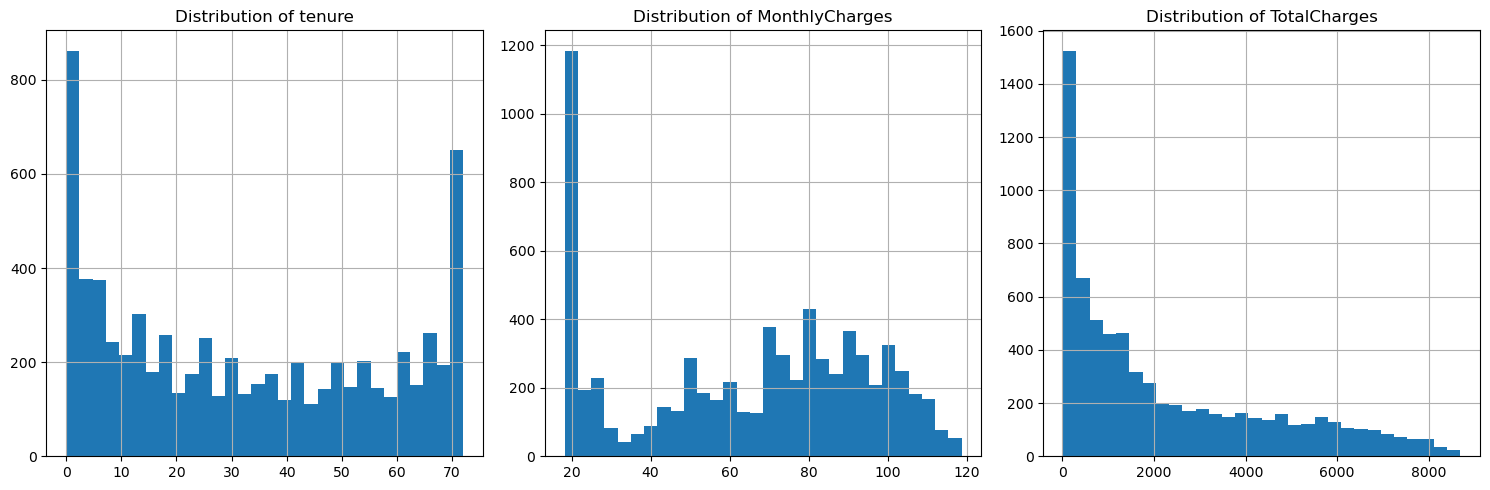

In [57]:
# Numerical variables
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

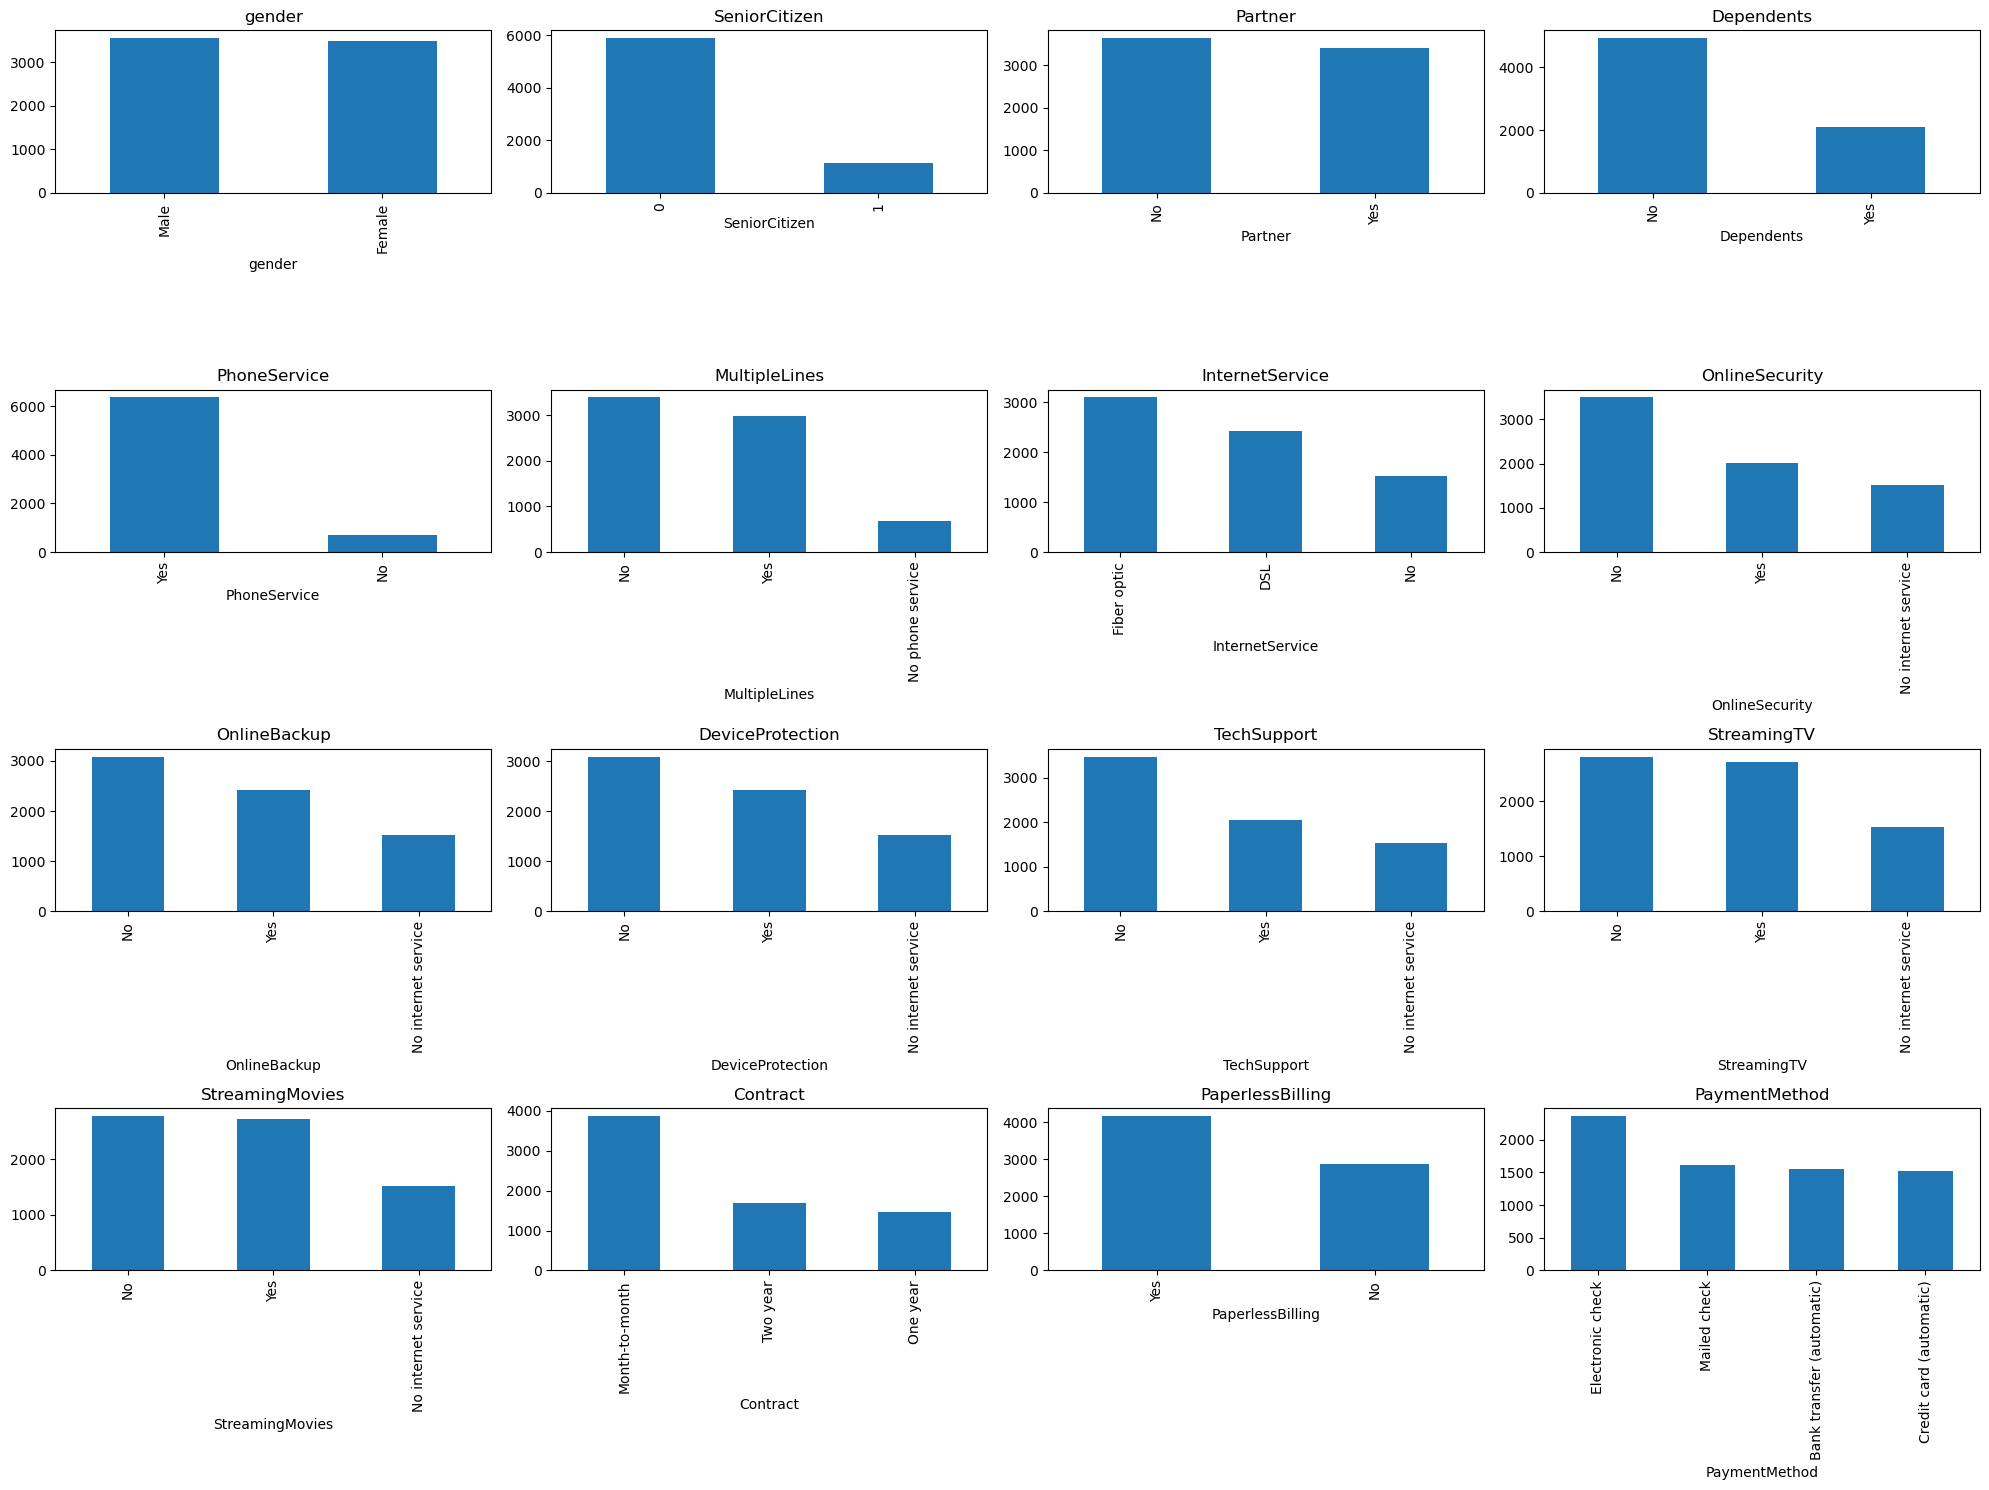

In [58]:
# Categorical variables
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.ravel()
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
plt.tight_layout()
plt.show()

# Bivariate Analysis with Churn

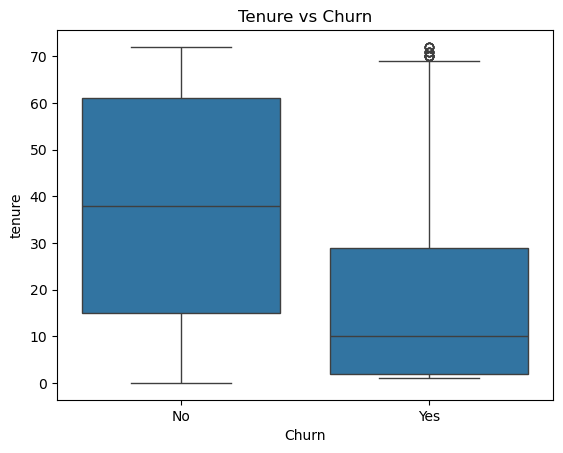

In [59]:
# Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.savefig('tenure_vs_churn.png')
plt.show()

Customers who churn tends to have significantly less tenure than who doesn't. There are few cases of customer churn who had long tenure of service with the company. 

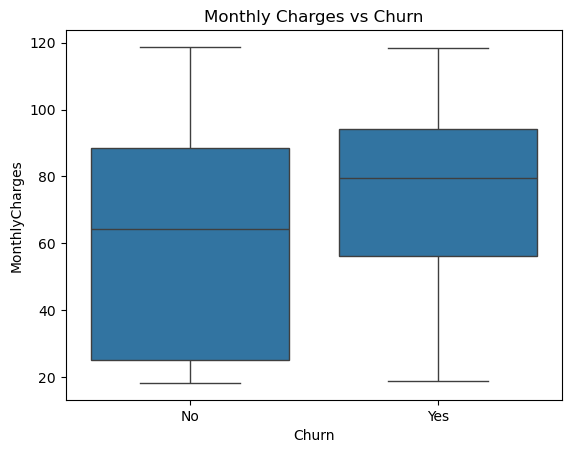

In [60]:
# MonthlyCharges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

Customers who churn have more higher monthly charges than who doesn't.

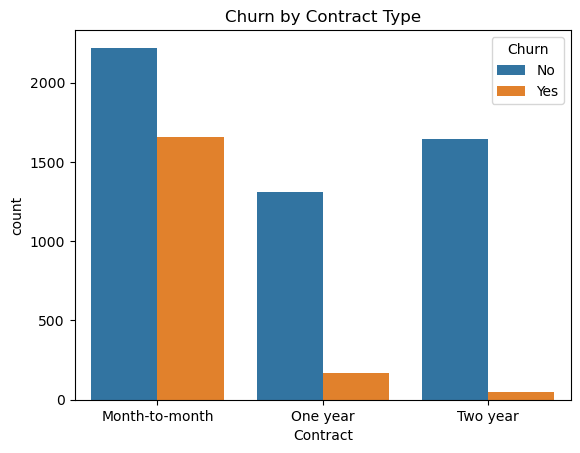

In [61]:
# Contract vs Churn
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.savefig('churn_by_contract.png')
plt.show()

Churn rate changes with the length of contract. Short contract means higher churn rate and long contract means lower churn rate.

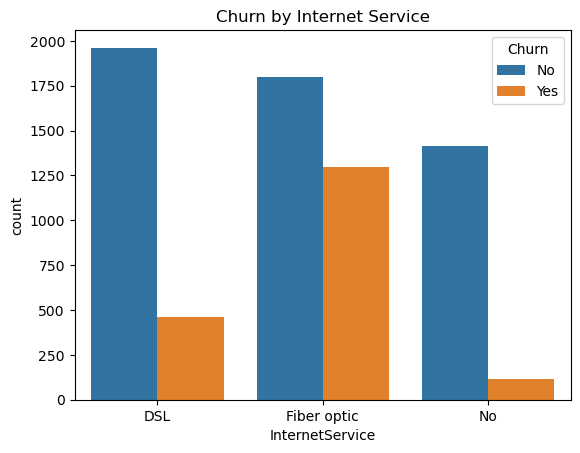

In [62]:
# InternetService vs Churn
sns.countplot(data= df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')
plt.show()

Fiber optic users churn more than DSL or no internet.

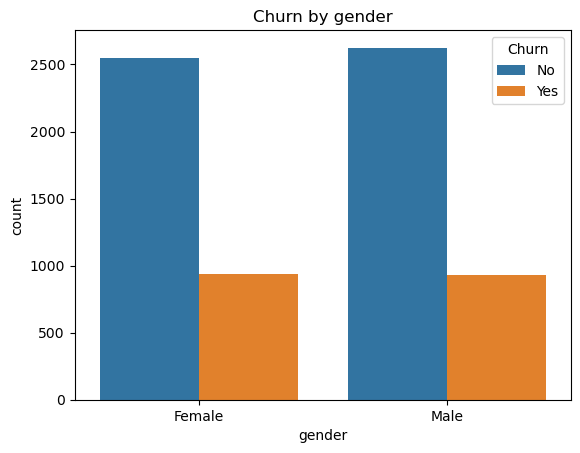

In [63]:
# gender vs Churn
sns.countplot(df, x= 'gender', hue= 'Churn')
plt.title('Churn by gender')
plt.show()

Churn rate are similar for male and female.

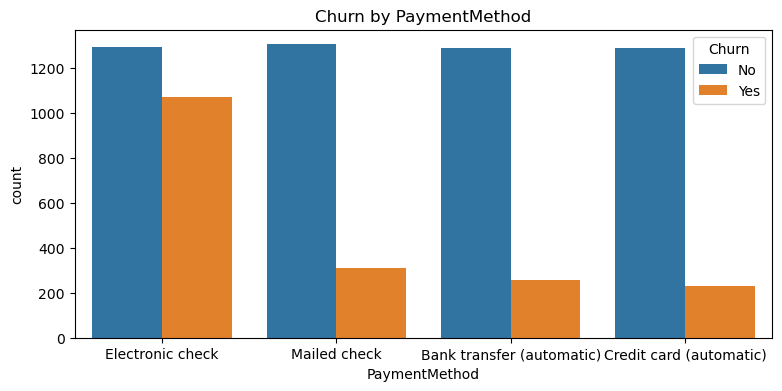

In [64]:
# PaymentMethod vs Churn
plt.figure(figsize=(9, 4))
sns.countplot(df, x= 'PaymentMethod', hue= 'Churn')
plt.title('Churn by PaymentMethod')
plt.show()

Electronic check got the significantly higher churn rate than the other ways of payment method.

# Correlation Analysis

In [65]:
# At firt, convert Churn to binary (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

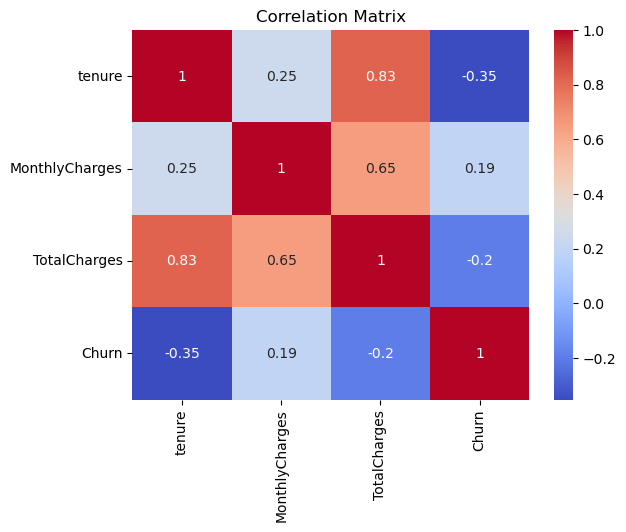

In [66]:
# Heatmap of numerical variables with Churn
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('Correlation_Matrix.png')
plt.show()

Tenure and TotalCharge have strong positive correlation and MonthlyCharges and TotalCharges have moderate positive correlation. Whereas, Churn have weak positive and negative correlation with MonthlyCharges and tenure respectively.

# Churn Rate by Key Categories

In [67]:
# Calculating Churn rate by key categories
def churn_rate(category):
    return df.groupby(category)['Churn'].mean().sort_values(ascending=False)

print("Churn Rate by Contract:")
print(churn_rate('Contract'))

print("\nChurn Rate by Internet Service:")
print(churn_rate('InternetService'))

print("\nChurn Rate by Payment Method:")
print(churn_rate('PaymentMethod'))

Churn Rate by Contract:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

Churn Rate by Internet Service:
InternetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: Churn, dtype: float64

Churn Rate by Payment Method:
PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn, dtype: float64


Top Churn Rate:
- Contract: Month-to-month (43%)
- Internet: Fiber optic (42%)
- Payment: Electronic check (45%)

# 5. Feature Engineering

In [68]:
# Drop CustomerId as it is not important
df = df.drop('customerID', axis= 1)

In [75]:
# Separate features and target
X = df.drop('Churn', axis= 1)
y = df['Churn']

In [76]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical features:", categorical_cols)
print("Numerical features:", numerical_cols)
print("Target distribution:")
print(y.value_counts(normalize=True))

Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Target distribution:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


# 6. Preprocessing Pipeline

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preprocessing for numerical features
numerical_transformer = StandardScaler()

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

# Bundle preprocessing
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Churn rate in training: {y_train.mean():.3f}")
print(f"Churn rate in test: {y_test.mean():.3f}")

Training set size: (5634, 19)
Test set size: (1409, 19)
Churn rate in training: 0.265
Churn rate in test: 0.265


# 7. Baseline Model

In [82]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Fit baseline model
baseline_model = pipeline.fit(X_train, y_train)

# Predictions
y_pred = baseline_model.predict(X_test)
y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Baseline Random Forest Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Baseline Random Forest Performance ===
Accuracy: 0.7857
ROC-AUC: 0.8246

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



# 8.  Hyperparameter Tuning with GridSearch

In [84]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# GridSearch with cross-validation
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='roc_auc', 
    n_jobs=-1, verbose=1
)

print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Starting hyperparameter tuning...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:
{'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best cross-validation score: 0.8450


# 9.  Final Model Evaluation

=== Optimized Random Forest Performance ===
Accuracy: 0.8062
ROC-AUC: 0.8430

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



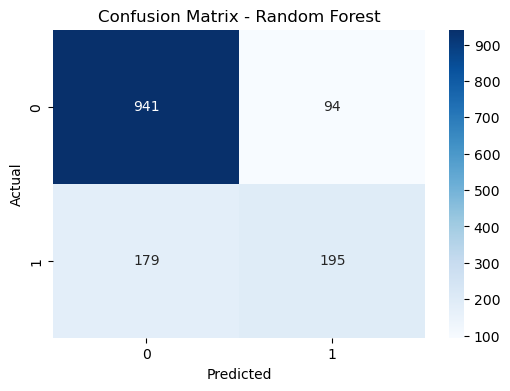

In [88]:
from sklearn.metrics import confusion_matrix

# Best model from grid search
best_model = grid_search.best_estimator_

# Predictions with best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print("=== Optimized Random Forest Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 10. Feature Importance Analysis

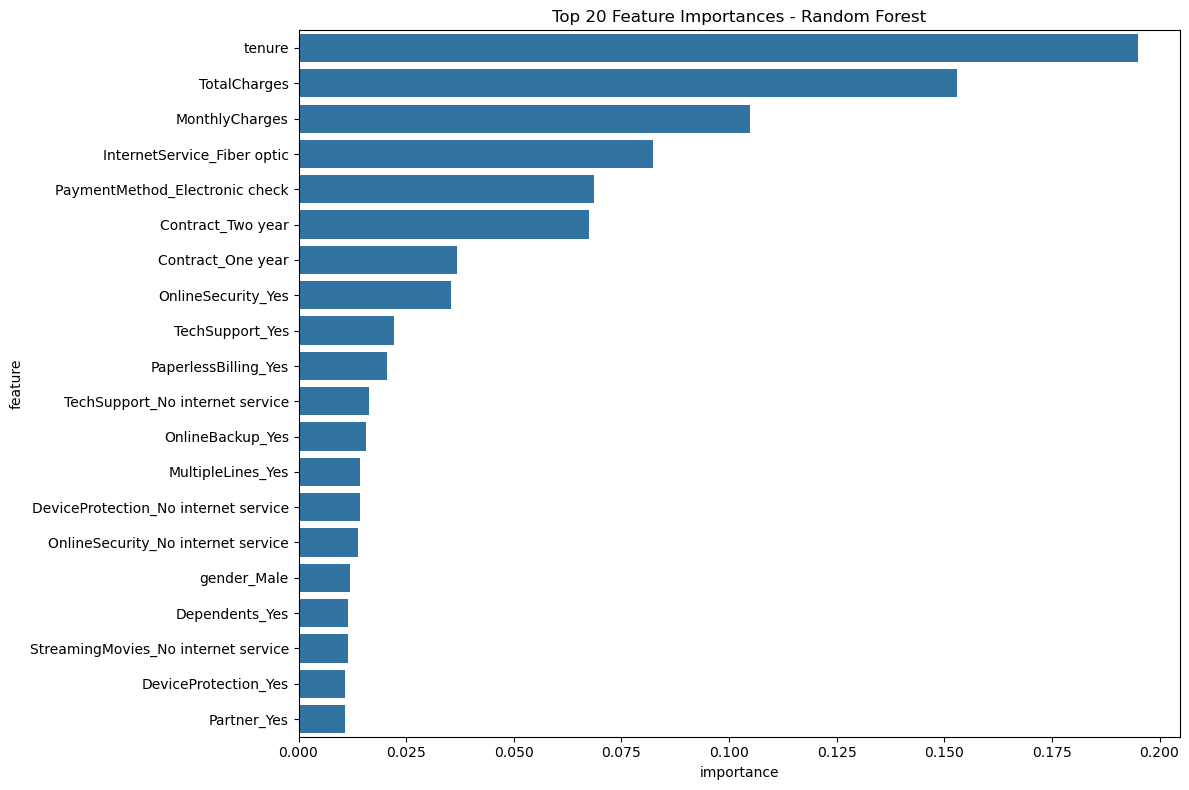

Top 10 Most Important Features:
                           feature  importance
1                           tenure    0.195007
3                     TotalCharges    0.153068
2                   MonthlyCharges    0.104835
10     InternetService_Fiber optic    0.082284
28  PaymentMethod_Electronic check    0.068605
25               Contract_Two year    0.067533
24               Contract_One year    0.036894
13              OnlineSecurity_Yes    0.035405
19                 TechSupport_Yes    0.022244
26            PaperlessBilling_Yes    0.020614


In [89]:
# Extract feature names after one-hot encoding
preprocessor = best_model.named_steps['preprocessor']
feature_names = numerical_cols.copy()

# Get categorical feature names after encoding
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_features = ohe.get_feature_names_out(categorical_cols)
feature_names.extend(cat_features)

# Get feature importances
importances = best_model.named_steps['classifier'].feature_importances_

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(20), y='feature', x='importance')
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# 11. Model Interpretation with SHAP

In [ ]:
#!pip install shap
import shap

# 11. Model Interpretation with SHAP
# Install SHAP if not available: pip install shap
try:
    import shap
    
    # Extract the preprocessed data
    X_train_processed = preprocessor.transform(X_train)
    
    # Create SHAP explainer
    explainer = shap.TreeExplainer(best_model.named_steps['classifier'])
    shap_values = explainer.shap_values(X_train_processed)
    
    # Summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values[1], X_train_processed, feature_names=feature_names, show=False)
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("SHAP not installed. Install with: pip install shap")

# 12. Cross-Validation Results

Cross-Validation ROC-AUC Scores:
Fold scores: [0.85898244 0.85624788 0.84413423 0.8383137  0.82755699]
Mean CV score: 0.8450 (+/- 0.0232)


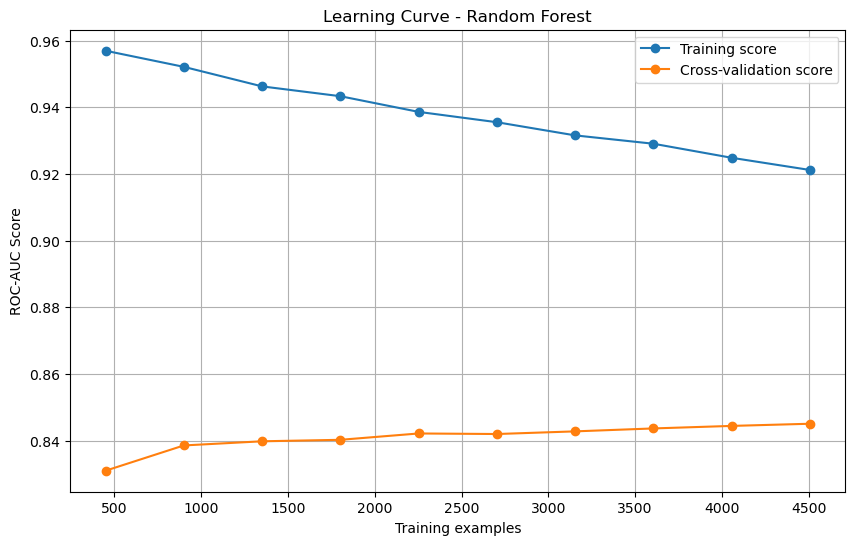

In [94]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train, y_train, 
                           cv=5, scoring='roc_auc')

print("Cross-Validation ROC-AUC Scores:")
print(f"Fold scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Learning curve (optional)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('ROC-AUC Score')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# 13. Model Persistence

In [96]:
import joblib

# Save the model
joblib.dump(best_model, 'random_forest_churn_model.pkl')

# Save feature names
joblib.dump(feature_names, 'feature_names.pkl')

print("Model saved as 'random_forest_churn_model.pkl'")

# Function to predict new data
def predict_churn(new_data, model=best_model):
    """
    Predict churn probability for new customer data
    """
    predictions = model.predict_proba(new_data)[:, 1]
    return predictions

# Example usage
sample_prediction = predict_churn(X_test.head(1))
print(f"Sample prediction probability: {sample_prediction[0]:.4f}")

Model saved as 'random_forest_churn_model.pkl'
Sample prediction probability: 0.0153


# 14. Business Metrics

In [97]:
# Calculate business metrics
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_best)

# Find optimal threshold (maximizing F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"Optimal F1-score: {f1_scores[optimal_idx]:.4f}")

# Apply optimal threshold
y_pred_optimal = (y_pred_proba_best >= optimal_threshold).astype(int)

print("\n=== Performance with Optimal Threshold ===")
print(classification_report(y_test, y_pred_optimal))

Optimal threshold: 0.2841
Optimal F1-score: 0.6356

=== Performance with Optimal Threshold ===
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

